# Laboratorio 2 - Parte 1

### Modelos no paramétricos

### 2019-II

#### Profesor: Julián D. Arias Londoño
#### julian.ariasl@udea.edu.co


## Guía del laboratorio

En esta archivo va a encontrar tanto celdas de código cómo celdas de texto con las instrucciones para desarrollar el laboratorio.

Lea atentamente las instrucciones entregadas en las celdas de texto correspondientes y proceda con la solución de las preguntas planteadas.

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

#### Primer integrante
Nombre: Santiago Gaviria Zapata
#### Segundo integrante
Nombre: Jorge Hiler Ricardo

In [62]:
from __future__ import division

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


#Algunas advertencias que queremos evitar
import warnings
warnings.filterwarnings("always")

## Ejercicio 1: Generar muestras

Genere un conjunto de 1000 muestras artificiales con una distribución que corresponda a la suma de dos Gaussiana con diferente media, ambas de una sola dimension. Grafique el histograma de los datos generados. (`plt.hist()`)

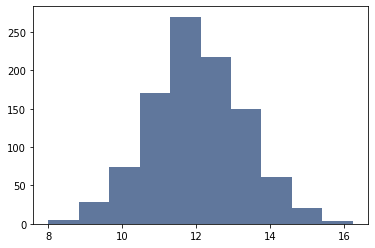

In [63]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np 
from scipy import stats 
import seaborn as sns 

N = 1000
desviacion = 0.9
gaussiana_1 = np.random.normal(8,desviacion,N)
gaussiana_2 = np.random.normal(4,desviacion,N)
sumaGauss1_2 = gaussiana_1 + gaussiana_2
plt.hist(sumaGauss1_2)
plt.show()




## Ejercicio 2: Contextualización del problema

Para el problema de regresion usaremos la misma base de datos del laboratorio anterior `AirQuality.data`. Esta es la base de datos del UCI Machine Learning Repository. En el siguiente URL se encuentra toda la descripción de la base de datos del problema http://archive.ics.uci.edu/ml/datasets/air+quality. Ejecute la siguiente celda para cargar los datos.

In [65]:
#Cargamos la bd que está en un archivo .data y ahora la podemos manejar de forma matricial
db = np.loadtxt('DB/AirQuality.data',delimiter='\t')  # Assuming tab-delimiter

#X: Toma las primeras 5000 filas(muestras) y las columnas 0-11 (carácteristicas)
X = db[:5000,0:12]

#Y: Toma las primeras 5000 filas y la columna 12, corresponde a la salida de la regresión
Y = db[:5000,12]




Describa cómo esta construida la base de datos utilizada en el problema de regresión: 

2.1 ¿Cuántas muestras hay en total?:

In [13]:
print(np.size(X,0))

5000


2.2 ¿Cuántas características tiene el problema?:

In [10]:
print(np.size(X,1))

12


## Ejercicio 3: Completar código de K-Vecinos

Analice los siguientes métodos de la teoría vista para los modelos de *K-vecinos más cercanos (KNN)* y complete el código del método KNN.

<b>Nota</b>: Para el cáculo de la distancia entre vectores tienen dos opciones, usar la función la distancia euclidiana `scipy.spatial.distance.euclidean`([Ejemplo](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.euclidean.html)) o usar la función `numpy.linalg.norm`([Ejemplo](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.norm.html)). Revisen la documentación para comprender su uso. También serán de utilidad las funciones `numpy.sort` y `numpy.argsort`.


In [66]:
import scipy as sc
from statistics import mean
import operator
N = np.size(X,0)


def compareWithEntryValue(enteredValue, X_train):
    n = len(X_train)
    result = np.zeros(n)
    i = 0
    for xi in X_train:
        result[i] = sc.spatial.distance.euclidean(xi, enteredValue)
        i = i + 1
    return result
        

def nearestNeighbors(k, distances):
    nearests = distances[:k]
    return nearests

def sortAndGetIndexes(array):
    indexes = np.argsort(array)
    return indexes

def getYiValues(Y, nearest):
    n = len(nearest)
    yiArray = np.zeros(n)
    iter = 0
    for i in nearest:
        yiArray[iter] = Y[i]
        iter = iter + 1
    return yiArray

def KNN(X_train, Y_train, X_test, k, tipo):
    
    #X_train: Matriz con las muestras de entrenamiento
    #Y_train: Vector con los valores de salida pra cada una de las muestras de entrenamiento
            
    
    #X_val: Matriz con las muestras de validación
    #tipo: Bandera que indica si el problema es de regresión o de clasificación.
    
    #Parámetro k que equivale al número de vecinos a tener en cuenta para resolver el problema de 
    #predicción de la variable de salida
    k = k 
    Nt = len(X_test)
    Y_test = np.zeros(Nt)
    
    N = np.size(X_train, 0)
    
    i = 0
    for enteredValue in X_test:
        distances = compareWithEntryValue(enteredValue, X_train)
        orderedNearest = sortAndGetIndexes(distances)
        nearest = nearestNeighbors(k, orderedNearest)
        yiArray = getYiValues(Y_train, nearest)
        
        if(tipo == 1):
            selected = sc.stats.mode(yiArray)
            mode = selected[0]
            Y_test[i] = mode
        elif(tipo == 0):
            meanYi = mean(yiArray)
            Y_test[i] = meanYi
        i = i+1
    #Debe retornar un vector que contenga las predicciones para cada una de las muestras en X_test, en el mismo orden.  
    return Y_test 

## Ejercicio 4: Entrenamiento y pruebas

Una vez haya completado el codigo del método de KNN:
1. Ejecute varias veces el proceso de entrenamiento y validación cambiando el parametro  $k$ que corresponde al número de vecinos
2. Completar la tabla de resultados con el error MAPE y la desviación estándar.

In [67]:
"""
Mean Absolute Percentage Error para los problemas de regresión
"""
def MAPE(Y_est,Y):
    N = np.size(Y)
    mape = np.sum(abs((Y_est.reshape(N,1) - Y.reshape(N,1))/Y.reshape(N,1)))/N
    return mape 


"""
Calcular el error en clasificación
"""
def error(Y_lest, Y):
    
    error = 0
    for ye, y in zip(Y_lest, Y):
        if ye != y:
            error += 1
    
    error = error/np.size(Y)
    
    return error

In [68]:
from numpy import random
from numpy import matlib
import math
from scipy import stats

N = np.size(X,0)

#Entrenamiento y validación del modelo
random.seed(1)
Error = np.zeros(2)

for j in range(2):
    
    ind=np.random.permutation(N)
    Xtrain = X[ind[0:int(math.ceil(0.7*N))],:]
    Xtest = X[ind[int(math.ceil(0.7*N)):N],:]
    Ytrain = Y[ind[0:int(math.ceil(0.7*N))]]
    Ytest = Y[ind[int(math.ceil(0.7*N)):N]]

    #Normalizamos los datos
    media = np.mean(Xtrain)
    desvia = np.std(Xtrain)
    Xtrain = sc.stats.stats.zscore(Xtrain)
    Xtest = (Xtest - np.matlib.repmat(media, Xtest.shape[0], 1))/np.matlib.repmat(desvia, Xtest.shape[0], 1)

    #Complete con el llamado apropiado de la función que Uds diseñaron 
    # Si tipo = 0 es un problema de regresión, si es igual a 1 es un problema de clasificación
    #(X_train, Y_train, X_val, k, tipo)
    k = 100
    tipo = 0
    
    Yest = KNN(Xtrain, Ytrain, Xtest, k, tipo)
    
    #Evaluamos las predicciones del modelo con los datos de test
    Error[j] = MAPE(Yest,Ytest)

mape = np.mean(Error)
std = np.std(Error)

print('\nError durante la prueba k=2 ' +  str(mape) + '+-' + str(std))

KeyboardInterrupt: 

Responda:

4.1 ¿Qué metodología de validación se usa en el experimento?

In [ ]:
Validación booststrap

4.2 ¿Cuántas muestras se usan para el entrenamiento?

In [59]:
np.size(Xtrain, 0)

3500

4.3 ¿Cuántas muestras se usan para la validación?

In [60]:
np.size(Xtest, 0)

1500

#### Tabla de resultados

In [44]:
import pandas as pd
#!pip install qgrid
import qgrid
randn = np.random.randn
df_types = pd.DataFrame({
    'Numero de vecinos' : pd.Series(['1', '2', '3', '4', '5', '6', '7', '100'])})
df_types["Error_Prueba"] = ""
df_types["Desviación estándar del error"] = ""
df_types.set_index(['Numero de vecinos'], inplace=True)
df_types["Error_Prueba"][1] = "0.3630"
df_types["Desviación estándar del error"][1] = "0.0061"
#df_types.sort_index(inplace=True)
qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

Ejecute la siguiente instrucción para dejar guardados en el notebook los resultados de las pruebas.

In [60]:
qgrid_widget.get_changed_df()

,Error_Prueba,Desviación estándar del error
Numero de vecinos,,
1,0.3840372997747079,0.016497301273993348
2,0.3630,0.0061
3,0.3497424913566185,0.0023601226154101596
4,0.3411712480403661,0.00456120202819571
5,0.3411712480403661,0.00456120202819571
6,0.3252859355963996,0.001992847379454543
7,0.3201103542753637,0.0007978802015047026
100,0.2687966192401249,0.00534054419560312


## Ejercicio 5: Ventana de Parzen

Resolver el mismo problema de regresión, pero con el modelo de *Ventana de Parzen*. Se debe completar el código de la función <font color='blue'>Nadaraya-Watson</font>  Recuerde la función de densidad de probabilidad con la ventana de Parzen.
$$f({\bf{x}}^*) = \frac{1}{N h^d} \sum_{i=1}^{N} K(u_i), \;\; u_i = \frac{d({\bf{x}}^*,{\bf{x}}_i)}{h}$$


Nota: Los métodos `dist_euclidiana` y ECM continuan siendo válidos para el modelo ventana de Parzen.


In [69]:
def kernel_gaussiano(x):
    return (np.exp((-0.5)*x**2))

def kernel_gaussiano(x):
    return (np.exp((-0.5)*x**2))        
       
    #Debe retornar un vector que contenga las predicciones para cada una de las muestras en X_val, en el mismo orden.      

def Nadaraya_Watson(X_train, Y_train, X_val, ancho_h, i):
   
    h = ancho_h    #Parámetro h que equivale al ancho de la ventana o kernel
    Nv = len(X_val)
    N = len(X_train)
    Y_val = np.zeros(Nv)
    Estimdador_NW = 0
   
    numerador = np.zeros(N)
    denominador = np.zeros(N)
   
    distances = compareWithEntryValue(X_val, X_train)
    u = distances/h
    k =  kernel_gaussiano(u)
    yi = Y_train[i]
    numerador =  (k*yi)
    denominador = k
       
    #Debe retornar un vector que contenga las predicciones para cada una de las muestras en X_val, en el mismo orden.      
    Y_valNum = numerador
    Y_valDen = k
    return Y_valNum, Y_valDen

def train(Xtest, X_train, Y_train, ancho_h):
    i = 0
    N = len(Xtest)
    Y_valNum = np.zeros(N)
    Y_valDen = np.zeros(N)
    for X_val in Xtest:
        Y_valNum[i], Y_valDen[i] = Nadaraya_Watson(Xtrain, Ytrain, X_val, ancho_h, i)
        i = i+1
   
    ventParz = np.sum(Y_valNum[i])/np.sum(Y_valDen)
    return ventParz
   

h = 0.1
   
Yest = train(Xtest, Xtrain, Ytrain, h)
#Evaluamos las predicciones del modelo con los datos de test
Error = MAPE(Yest,Ytest)

mape = np.mean(Error)
std = np.std(Error)

print('\nError durante la prueba h = '+ str(h) +' es ' +  str(mape) + '+-' + str(std))


ValueError: setting an array element with a sequence.

## Ejercicio 6: Entrenamiento y pruebas

Una vez haya completado el codigo del método de Ventana de Parzen, ejecute varias veces el proceso de entrenamiento y validación cambiando el parametro $h$, que corresponde al ancho de la función kernel. Completar la siguiente tabla con los valores del error MAPE obtenidos y su desviación estándar:

#### Tabla de resultados

In [6]:
randn = np.random.randn
df_types2 = pd.DataFrame({
    'Ancho del kernel' : pd.Series(['0.1', '0.9', '1', '2', '3', '5', '10'])})
df_types2["Error_Prueba"] = ""
df_types2["Desviación estándar del error"] = ""
df_types2.set_index(['Ancho del kernel'], inplace=True)
df_types2["Error_Prueba"][1] = "0.3011"
df_types2["Desviación estándar del error"][1] = "0.0031"
#df_types.sort_index(inplace=True)
qgrid_widget = qgrid.show_grid(df_types2, show_toolbar=False)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

Ejecute la siguiente instrucción para dejar guardados en el notebook los resultados de las pruebas.

In [99]:
qgrid_widget.get_changed_df()

,Error_Prueba,Desviación estándar del error
Ancho del kernel,,
0.1,,
0.9,0.3011,0.0031
1,,
2,,
3,,
5,,
10,,


Responda:

6.1 Si intenta repetir la prueba anterior para un $h = 0.05$ el algoritmo falla. ¿Cuál es la causa de la falla?:

Debido a que el peso asignado a los puntos mas lejanos será muy grandes

6.2 ¿Cómo evito que se presente la excepción?:

Hacer que todos los valores sean de alta preisión almacenando mas decimales